In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential  
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [62]:
df=pd.read_csv("IMDB Dataset.csv")
print(df.info())
print(df['sentiment'].value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB
None
sentiment
positive    25000
negative    25000
Name: count, dtype: int64


In [63]:
df['sentiment']=df['sentiment'].map({'positive':1,'negative':0})
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1


In [64]:
tokenizer = Tokenizer(num_words=10000, oov_token="<OOV>")
tokenizer.fit_on_texts(df['review'])
X = tokenizer.texts_to_sequences(df['review'])

y = df['sentiment'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [65]:
max_length = 250

X_train_padded = pad_sequences(X_train, maxlen=max_length, padding='post', truncating='post')
X_test_padded = pad_sequences(X_test, maxlen=max_length, padding='post', truncating='post')


In [68]:
X_train_padded = np.array(X_train_padded)
X_test_padded = np.array(X_test_padded)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [69]:
model = Sequential([
    Embedding(input_dim=10000, output_dim=128),
    Dropout(0.2),
    LSTM(64),
    Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_11 (Embedding)        │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_10 (LSTM)                  │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [70]:
history = model.fit(
    X_train_padded, y_train,
    epochs=5,
    batch_size=32,
    validation_data=(X_test_padded, y_test),
    verbose=1
)

Epoch 1/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 91s 71ms/step - accuracy: 0.5136 - loss: 0.6924 - val_accuracy: 0.5055 - val_loss: 0.6929
Epoch 2/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 88s 70ms/step - accuracy: 0.5456 - loss: 0.6734 - val_accuracy: 0.7317 - val_loss: 0.6234
Epoch 3/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 85s 68ms/step - accuracy: 0.8022 - loss: 0.4522 - val_accuracy: 0.8586 - val_loss: 0.3180
Epoch 4/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 82s 65ms/step - accuracy: 0.9024 - loss: 0.2514 - val_accuracy: 0.8808 - val_loss: 0.2879
Epoch 5/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 76s 61ms/step - accuracy: 0.9305 - loss: 0.1865 - val_accuracy: 0.8793 - val_loss: 0.2967


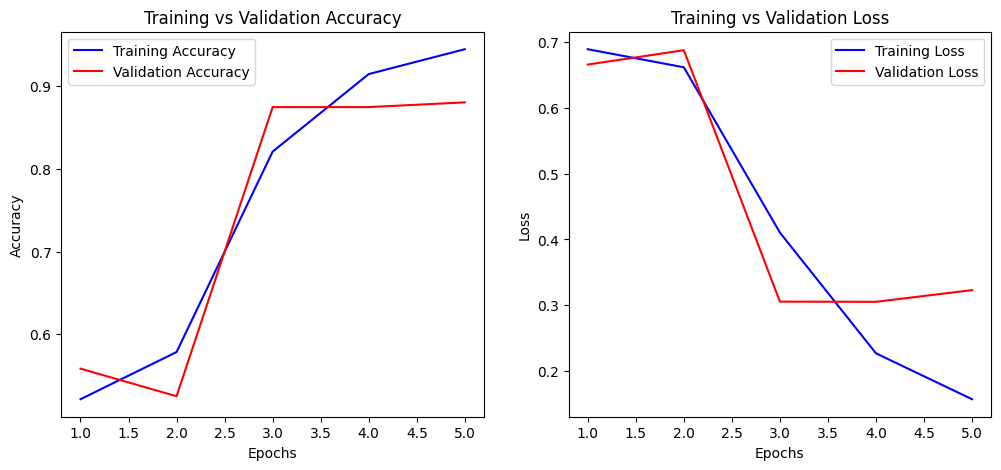

In [ ]:
# Extract accuracy and loss
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

# Plot accuracy
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs, acc, 'b', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training vs Validation Accuracy')

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training vs Validation Loss')

plt.show()


In [ ]:
def predict_review(review, tokenizer, model, max_length):
    # Convert review to lowercase and tokenize
    sequence = tokenizer.texts_to_sequences([review])

    # Pad the sequence
    padded_sequence = pad_sequences(sequence, maxlen=max_length, padding='post', truncating='post')

    # Make prediction
    prediction = model.predict(padded_sequence)[0][0]  # Get probability score

    # Interpret the result
    sentiment = "Positive 😊" if prediction > 0.5 else "Negative 😞"
    
    print(f"Review: {review}")
    print(f"Sentiment: {sentiment} (Score: {prediction:.4f})")

    return sentiment

# Example reviews
review1 = "This movie was fantastic! I loved the storyline and the actors were amazing."
review2 = "I hated this movie. It was a complete waste of time."

# Predict sentiments
predict_review(review1, tokenizer, model, max_length)
predict_review(review2, tokenizer, model, max_length)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step
Review: This movie was fantastic! I loved the storyline and the actors were amazing.
Sentiment: Positive 😊 (Score: 0.9887)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Review: I hated this movie. It was a complete waste of time.
Sentiment: Negative 😞 (Score: 0.0127)


'Negative 😞'